In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
import seaborn as sns
female_literacy_fertility = pd.read_csv('female_literacy_fertility.csv')
literacy = female_literacy_fertility.iloc[1:,2].values
illiteracy = 100 - literacy
fertility = female_literacy_fertility.iloc[1:,3].values
sns.set_theme()
wd=os.getcwd()
os.listdir(wd)
nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545, 715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,876,  381,  905,  156,  419,  239,  119,  129,  467])
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]
weather = pd.read_csv('sheffield_weather_station.csv',header=8,delim_whitespace=True)
weather.columns=['year','month','Max Temp Cel.','Min Temp Cel.','Airfrost','Rain','Sun Hours']
yearly_weather = weather.groupby('year').sum()
rainfall = yearly_weather.loc[1:,'Rain'].values
june = weather[weather['month']==6]
november = weather[weather['month']==11]
rain_june = june.loc[1:,'Rain'].values
rain_november = november.loc[1:,'Rain'].values
#Here we are creating the df values that match the exercise
FROGGY = pd.read_csv('frog_tongue.csv', header=14)
FROG = FROGGY[(FROGGY['ID'] == 'II') | (FROGGY['ID'] == 'IV') ]
df = FROG.drop(FROG.columns[[0, 2, 4,5,6,7,8,9,10,11,12,13,14]], axis=1)
df.rename(columns={'ID': 'ID', 'impact force (mN)': 'impact_force'}, inplace=True)
df.impact_force = df.impact_force / 1000
#df.iloc[startrow:endrow, startcolumn:endcolumn]
force_a = df.iloc[0:20,1].values
force_b = df.iloc[20:39,1].values
forces_concat = df.iloc[:,1].values
empirical_diff_means = np.mean(force_a) - np.mean(force_b)
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,419,  239,  119,  129,  467])
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

NameError: name 'versicolor_petal_length' is not defined

# 1. A/B testing
Imagine your company has a proposed redesign of the splash page of its website. They are interested in how many more users click through to the website for the redesign versus the original design. You devise a test.

2. Is your redesign effective?
Take a set of 1000 visitors to the site and direct 500 of them to the original splash page and 500 of them to the redesigned one. You determine whether or not each of them clicks through to the rest of the website. On the original page, which we'll call page A,

3. Is your redesign effective?
45 visitors clicked through, and on the redesigned page, page B, 67 visitors clicked through. This makes you happy because that is almost a 50% increase in the click-through rate. But maybe there really is no difference between the effect of two designs on click-through rate and the difference you saw is due the random chance. You want to check: what is the probability that you would observe at least the observed difference in number of clicks through if that were the case? This is asking exactly the question you can address with

4. Null hypothesis
a hypothesis test. A permutation test is a good choice here because you can simulate the result as if the redesign had no effect on the click-through rate. Let's code it up in Python:

5. Permutation test of clicks through
for each splash page design, we have a NumPy array which contains 1 or 0 values for whether or not a visitor clicked through. Next, we need to define a function diff_frac for our test statistic. Ours is the fraction of visitors who click through. We can compute the fraction who click through by summing the entries in the arrays of ones and zeros and then dividing by the number of entries. Finally we compute the observed value of the test statistic using this function diff_frac. Now everything is in place to generate our permutation replicates of the test statistic

6. Permutation test of clicks through
using the permutation_replicate function you wrote in the exercises; we will generate 10,000. We compute the p-value as the number of replicates where the test statistic was at least as great as what we observed. We get a value of 0-point-016, which is relatively small, so we might reasonably think that the redesign is a real improvement. This is an example of an A/B test.

7. A/B test
A/B testing is often used by organizations to see if a change in strategy gives different, hopefully better, results. Generally,

8. Null hypothesis of an A/B test
the null hypothesis in an A/B test is that your test statistic is impervious to the change. A low p-value implies that the change in strategy lead to a change in performance. Once again, though, be warned that statistical significance does not mean practical significance. A difference in click-though rate may be statistically significant, but if it is only a couple people more per day, your marketing team may not consider the change worth the cost! A/B testing is just a special case of the hypothesis testing framework we have already been working with, a fun and informative one.

9. Let's practice!
Let's practice in with some exercises!

# The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

Instructions
70 XP
Construct Boolean arrays, dems and reps that contain the votes of the respective parties; e.g., dems has 153 True entries and 91 False entries.
Write a function, frac_yea_dems(dems, reps) that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your draw_perm_reps() function, but the second is not used.
Use your draw_perm_reps() function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
Compute and print the p-value.


Show Answer (-70 XP)
Hint
You can initialize an array with np.array(). For example, the statement np.array([True] * 5 + [False] * 3) creates a Boolean array with 5 True entries and 3 False entries.
A 'yea' vote, in Boolean terms, is represented as a 1, or a True, while a 'nay' is represented as a 0, or a False. To calculate the fraction of Democrats that voted 'yea', you can add all the entries in your dems array with np.sum, and divide it by the total number of entries (which you can calculate with len()).
In draw_perm_reps(), the func argument should be the function you wrote above. Recall that the other arguments needed are your two arrays and the number of permutation replicates you want to draw.
The p-value can be computed by calculating the fraction of perm_samples that are <= the value returned by frac_yea_dems (which also happens to be the mean of Democrat votes). This can be done by appropriately using np.sum() in the numerator and len() in the denominator.

In [22]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps =np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


#### This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

# A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

Since you will be using your draw_perm_reps() function in this exercise, it may be useful to remind yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring back to the chapter 3 exercise in which you defined it.


Compute the observed difference in mean inter-nohitter time using diff_of_means().

Generate 10,000 permutation replicates of the difference of means using draw_perm_reps().

Compute and print the p-value.


Show Answer (-70 XP)
Hint

Use your diff_of_means() function to calculate the difference between nht_dead and nht_live.

Use your draw_perm_reps() function to generate the 10,000 replicates. The func argument here is diff_of_means.
The p-value here is the fraction of permutation replicates that are <= the observed difference in mean inter-nohitter times you computed above and stored in nht_diff_obs.

In [23]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates<=nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#### Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001. 

 What should you have done first?That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters. But what should you have done with the data first?

#### Performed EDA, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras

Yes! Always a good idea to do first! I encourage you to go ahead and plot the ECDFs right now. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

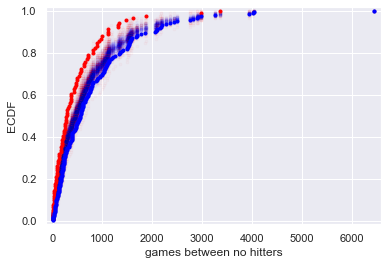

In [24]:
for i in range(0,50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(nht_dead,nht_live)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(nht_dead)
x_2, y_2 = ecdf(nht_live)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('games between no hitters')
_ = plt.ylabel('ECDF')
plt.show()

# 1. Test of correlation
Consider again the swing state county-level voting data.

2. 2008 US swing state election results
In the prequel to this course, we computed the Pearson correlation coefficient between Obama's vote share and the total number of votes. Remember the Pearson correlation coefficient is a measure of how much of the variability in two variables is due to them being correlated. It ranges from -1 for totally negatively correlated to 1 for positively correlated. We got a value of about point-54. This value of the Pearson correlation indicates that the data are not perfectly correlated, but are correlated nonetheless. But how can we know for sure if this correlation is real, or if it could have happened just by chance?

1 Data retrieved from Data.gov (https://www.data.gov/)
3. Hypothesis test of correlation
We can do a hypothesis test! We posit a null hypothesis that there is no correlation between the two variables, in this case Obama's vote share and total votes. We then simulate the election assuming the null hypothesis is true (which you will figure out how to do in the exercises), and use the Pearson correlation coefficient as the test statistic. The p-value is then the fraction of replicates that have a Pearson correlation coefficient at least as large as what was observed. I did this procedure, and in all 10,000 of my replicates under the null hypothesis,

4. More populous counties voted for Obama
not one had a Pearson correlation coefficient as high as the observed value of point-54. I tried generating 100,000, and then a million replicates. In all cases, not one replicate had a Pearson correlation coefficient as high as point-54. This does not mean that the p-value is zero. It means that it is so low that we would have to generate an enormous number of replicates to have even one that has a test statistic sufficiently extreme. We conclude that the p-value

5. More populous counties voted for Obama
is very very small and there is essentially no doubt that counties with higher vote count tended to vote for Obama. After all, that is how he won the election.

6. Let's practice!
Now it is your turn to think about how to do a hypothesis test on correlation and execute it!

Simulating a null hypothesis concerning correlation
The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to do it?
#### Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

# Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function pearson_r() that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already available for you.


Compute the observed Pearson correlation between illiteracy and fertility.

Initialize an array to store your permutation replicates.

Write a for loop to draw 10,000 replicates:

Permute the illiteracy measurements using np.random.permutation().

Compute the Pearson correlation between the permuted illiteracy array, illiteracy_permuted, and fertility.

Compute and print the p-value from the replicates.

# Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function pearson_r() that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already available for you.

Instructions
70 XP
Compute the observed Pearson correlation between illiteracy and fertility.
Initialize an array to store your permutation replicates.
Write a for loop to draw 10,000 replicates:
Permute the illiteracy measurements using np.random.permutation().
Compute the Pearson correlation between the permuted illiteracy array, illiteracy_permuted, and fertility.
Compute and print the p-value from the replicates.


Show Answer (-70 XP)
Hint
Use the pearson_r() function to compute the observed Pearson correlation between illiteracy and fertility.
Use np.empty(10000) to initialize an array to store your 10,000 permutation replicates.
Inside the for loop, you can permute the illiteracy measurements with np.random.permutation(illiteracy).
For each iteration of the for loop, compute the Pearson correlation between illiteracy_permuted and fertility.
The p-value from the replicates here is the fraction of permutation replicates that are greater than or equal to the observed correlation r_obs.

In [25]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#### You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

# Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the NumPy array control) and bees treated with pesticide (stored in the NumPy array treated).

Instructions
0 XP
Use your ecdf() function to generate x,y values from the control and treated arrays for plotting the ECDFs.
Plot the ECDFs on the same plot.
The margins have been set for you, along with the legend and axis labels. Hit submit to see the result!

Hint
The ecdf() function returns the x and y values of the array you pass into it. Here, the arrays of interest are control and treated. Generate the x and y values from these.
Inside plt.plot(), you need to specify the x and y values that you generated with the ecdf() function. The marker and linestyle keyword arguments have already been specified for you.

In [68]:
#Preparing data for bee sperm question
df = pd.read_csv('bee_sperm.csv',header=3)
df = df.drop(df.columns[[0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17]], axis=1)
df.rename(columns={'Treatment':'treatment','Sperm Volume per 500 ul':'bee_sperm'},inplace=True)
df.bee_sperm = df.bee_sperm /1000000
treated = df[df['treatment']== 'Pesticide']
control = df[df['treatment']!= 'Pesticide']
treated = treated.iloc[1:,1].values
control = control.iloc[1:,1].values


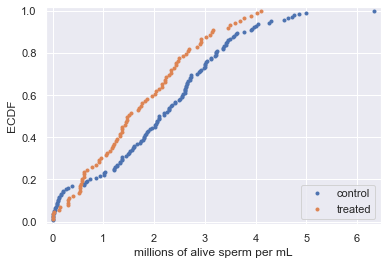

In [67]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


#### Nice plot! The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

# Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

For your reference, the call signature for the draw_bs_reps() function you wrote in chapter 2 is draw_bs_reps(data, func, size=1).


Compute the mean alive sperm count of control minus that of treated.

Compute the mean of all alive sperm counts. To do this, first concatenate control and treated and take the mean of the concatenated array.

Generate shifted data sets for both control and treated such that the shifted data sets have the same mean. This has already been done for you.

Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. Use your draw_bs_reps() function.

Compute the bootstrap replicates of the difference of means.


The code to compute and print the p-value has been written for you. Hit submit to see the result!

You can use the np.mean() function to individually compute the means of control and treated. Take the difference of these and store the result in diff_means.

To pool the data, you need to first concatenate control and treated by passing them in as arguments to np.concatenate(). 

Then, you can take the mean of the pooled data with np.mean().

Inside the draw_bs_reps() function, you need to pass in the shifted data arrays for control and treated. The arguments for func and size have already been specified for you.

Subtract the replicates of the shifted treated data set from that of the shifted control data set to compute the bootstrap replicates of the difference of means.

In [71]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.005
